In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import silhouette_score

df=sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [2]:
X=df.drop("species",axis=1)
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
df["clusters"]=kmeans.labels_
print(kmeans.cluster_centers_)


[[ 0.57100359 -0.37176778  0.69111943  0.66315198]
 [-0.81623084  1.31895771 -1.28683379 -1.2197118 ]
 [-1.32765367 -0.373138   -1.13723572 -1.11486192]]


In [4]:
sil_score=silhouette_score(X_scaled,kmeans.labels_)
print(sil_score)

0.4798814508199817


In [5]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,clusters
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,2
2,4.7,3.2,1.3,0.2,setosa,2
3,4.6,3.1,1.5,0.2,setosa,2
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0
146,6.3,2.5,5.0,1.9,virginica,0
147,6.5,3.0,5.2,2.0,virginica,0
148,6.2,3.4,5.4,2.3,virginica,0


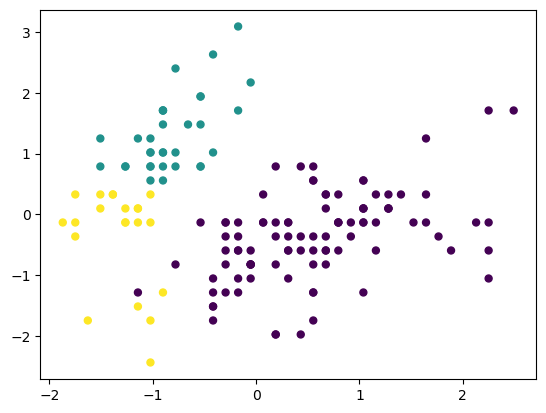

In [6]:


plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df["clusters"], s=25)

plt.show()

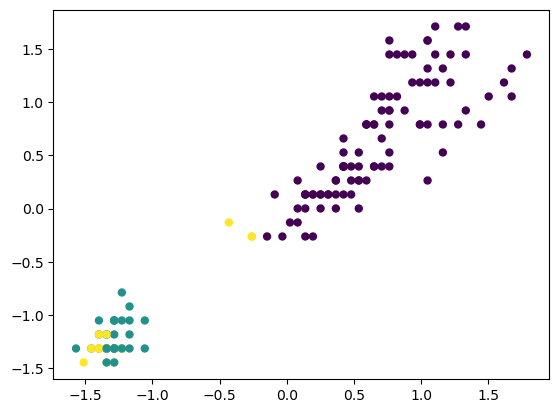

In [7]:

plt.scatter(X_scaled[:, 2], X_scaled[:, 3], c=df["clusters"], s=25)

plt.show()

In [8]:
wcss=[]

for i in range(1,11):
    knn=KMeans(n_clusters=i)
    knn.fit_transform(X_scaled)
    wcss.append(knn.inertia_)

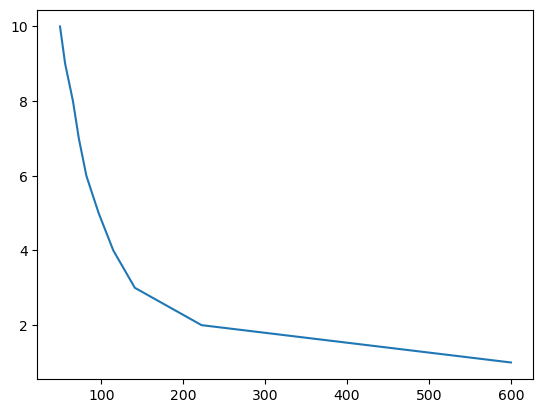

In [9]:
plt.plot(wcss,range(1,11))
plt.show()

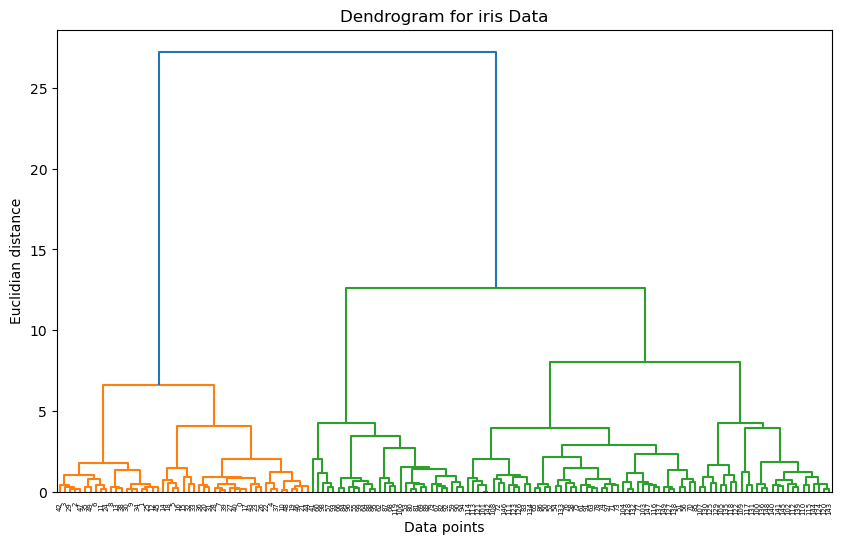

In [10]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram,linkage
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris=load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df["species"]=iris.target
X=df.drop("species",axis =1)
scaler =StandardScaler()
X_scaled=scaler.fit_transform(X)
plt.figure(figsize=(10,6))
linked=linkage(X_scaled,method='ward')
dendrogram(linked)
plt.title("Dendrogram for iris Data")

plt.xlabel("Data points")
plt.ylabel("Euclidian distance")
plt.show()